In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('data/airline_model_data.csv')

In [7]:
# Define X and Y
X = df.drop(columns=['satisfaction_binary', 'id', 'unnamed:_0'])
y = df['satisfaction_binary']

In [9]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
# Scale the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

- **Scaling standardizes feature values** so they have a mean of 0 and standard deviation of 1, which ensures that features with larger numerical ranges don’t unfairly dominate models like Logistic Regression or KNN.

In [13]:
# Fit the model
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=1000, random_state=42)

- **`max_iter`** sets the maximum number of iterations the Logistic Regression solver will take to converge. If the model is complex or the data isn’t scaled, it may need more steps to find the best fit. Increasing `max_iter` (e.g., to 1000) ensures the algorithm has enough room to converge without error.

Accuracy: 0.8764737019392714
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



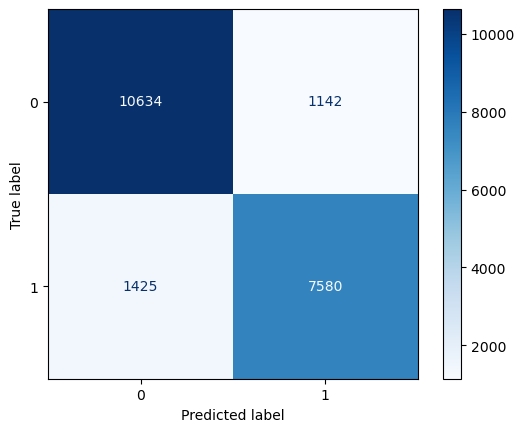

In [17]:
# Predict and evaluate
# Make predictions on the test set
y_pred_logr = logr.predict(X_test_sc)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_logr))

# Print precision, recall, f1-score
print(classification_report(y_test, y_pred_logr))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap='Blues');